# Bayesian Classification
- Relies on Bayes' Theorem: an equation describing the relationship of conditional probabilities of statistical quantities.
- We're interested on finding the probability of a label, given some observed features.
  
$P(L|feature)=\frac {P(features|L)\;P(L)}{P(features)}$  
- If we make a very naive assumption about the generative model for each label, we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

from sklearn.datasets import make_blobs

## Gaussian Naive Bayes
The assumption is that data from each label is drawn from a *simple Gaussian distribution* with no covariance between dimensions.

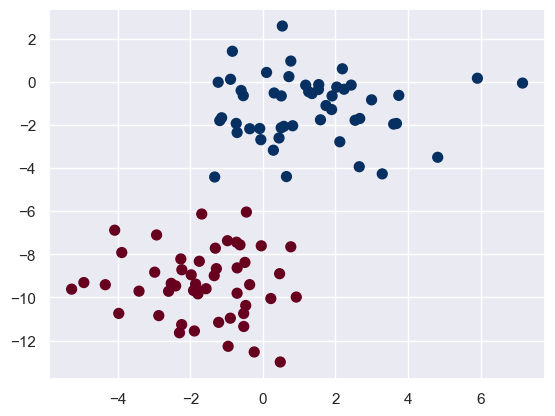

In [4]:
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

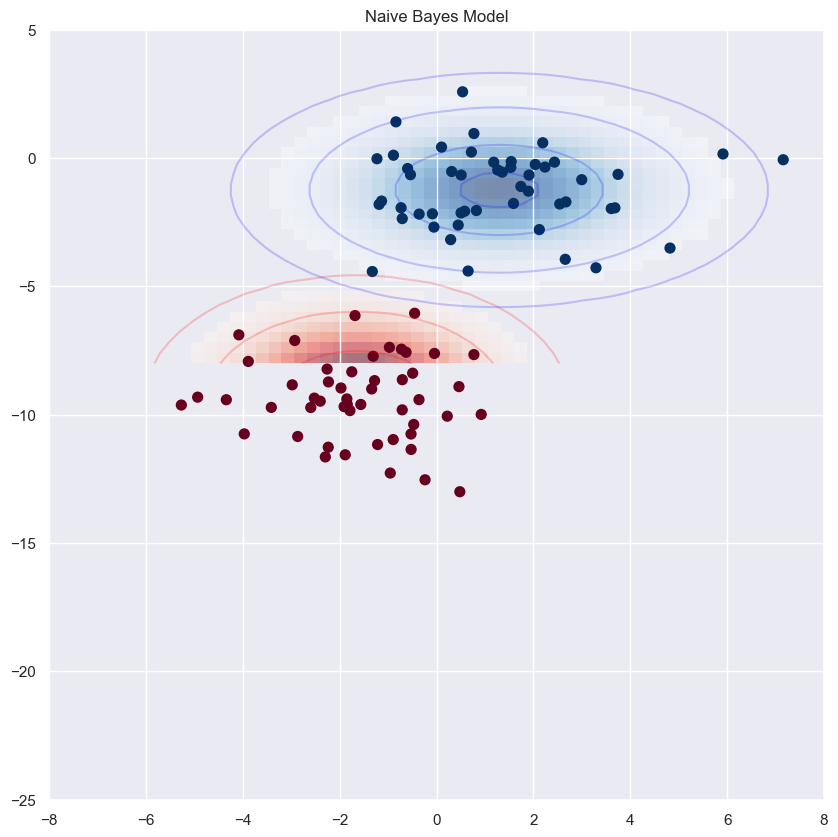

In [10]:
# final result
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model')

xlim = (-8,8)
ylim = (-25,5)

xg = np.linspace(xlim[0],xlim[1],60)
yg = np.linspace(xlim[0],xlim[1],40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

    
for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim);

## When to use Naive Bayes
- When the naive assumptions actually match the data (rare in practice)
- For well-separated categories, when model complexity is less important
- Very high-dimensional data